In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


--2024-11-01 17:50:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 142.251.184.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   205MB/s    in 0.3s    

2024-11-01 17:50:11 (205 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation to the training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # For binary classification (cats vs dogs)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.4964 - loss: 0.7561 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5157 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5099 - loss: 0.6909 - val_accuracy: 0.5410 - val_loss: 0.6533
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5780 - loss: 0.6692 - val_accuracy: 0.6250 - val_loss: 0.6548
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.5544 - loss: 0.6570 - val_accuracy: 0.5180 - val_loss: 0.6983
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5304 - loss: 0.6951 - val_accuracy: 0.5680 - val_loss: 0.6634
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5712 - loss: 0.6728 - val_accuracy: 0.6360 - val_loss: 0.6346
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6228 - loss: 0.6580 - val_accuracy: 0.6400 - val_loss: 0.6319


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - accuracy: 0.6411 - loss: 0.6202
Validation Accuracy: 0.65


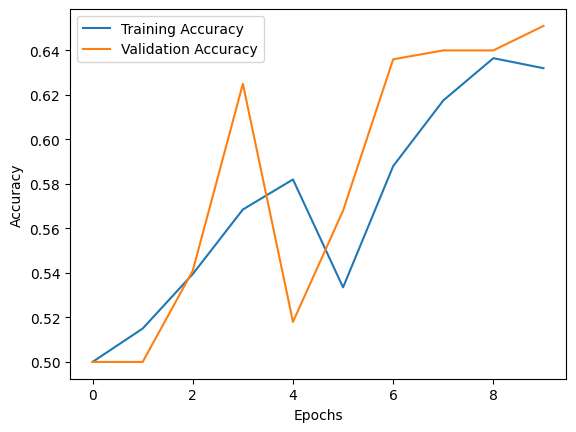

In [12]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()